In [1]:
import numpy as np
from helpers import *
from cross_validation import *
from img_preprocessing import *

# Load the training set
root_dir = "training/"
n = 100 #choose the number of images for the train

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
print("Loading " + str(n) + " images")
imgs = np.asarray([load_image(image_dir + files[i]) for i in range(n)])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " gt_images")
gt_imgs = np.asarray([load_image(gt_dir + files[i]) for i in range(n)])

Loading 100 images
Loading 100 gt_images


# Preprocessing :

To have good results with clustering it is necessary to change the patch size

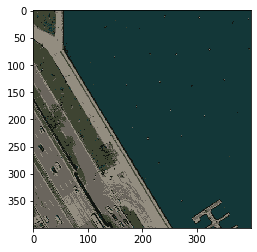

In [38]:
imgs_med = median(imgs,3,n)
img_pre = np.array([preprocess_image_rgb(imgs[i]) for i in range(n)])

k = 5
max_iter = 100
threshold = 1e-4

img_cluster = np.array([kmean_compression(imgs_med[i], img_pre[i], k, max_iter, threshold) for i in range(n)])
plt.imshow(img_cluster[2])

In [3]:
from logistic_regression import LogisticModel

model = LogisticModel()

In [6]:
np.random.seed(1) 
cross_validation(model, gt_imgs, imgs, 4, 1,80)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.6912


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.6848


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.7456


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.7232
[0.6912 0.6848 0.7456 0.7232]
Average accuracy: 0.7111999999999999


In [7]:
from displaymask import *

In [8]:
from logistic_regression import *

patch_size = 4
model.initialize_model()
Z = model.logisticReg(img_cluster, patch_size)



NameError: name 'img_cluster' is not defined

In [ ]:
patch_size = 4
img_idx = 0
Zi = Z[img_idx*round(400**2/(4**2)):(img_idx+1)*round(400**2/(4**2))]


In [ ]:
w = gt_imgs[img_idx].shape[0]
h = gt_imgs[img_idx].shape[1]
predicted_im = label_to_img(w, h, patch_size, patch_size, Zi)
cimg = concatenate_images(imgs[img_idx], predicted_im)
fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size 
plt.imshow(cimg, cmap='Greys_r')

new_img = make_img_overlay(imgs[img_idx], predicted_im)

plt.imshow(new_img)